<a href="https://colab.research.google.com/github/cabralluana/treinamento_turma3/blob/main/Rede_neural_convolucional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os, warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.layers import Flatten, Activation, Conv2D, MaxPool2D, Dense, Dropout, BatchNormalization, Input, MaxPooling2D, Flatten, Activation, Conv2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.models import Model

def set_seed(seed = 31415):
  np.random.seed(seed)
  tf.random.set_seed(seed)
  os.environ["PYTHONHASHSEED"] = str(seed)
  os.environ["TF_DETERMINISTIC_OPS"] = "1"
set_seed()

In [2]:
# Exercício 11.1 - Nº 01
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

for x in [x_train, x_test]:
  x = x/255

yTrainCod = np_utils.to_categorical(y_train)
yTestCod = np_utils.to_categorical(y_test)

170508288/170498071 [==============================] - 14s 0us/step


In [3]:
# Exercício 11.1 - Nº 02
def visu(img,r):
  rCat = pd.Series(r.flatten()).map(({0: "airplane", 1: "automobile", 2: "bird", 3: "cat",
                                                4: "deer", 5: "dog", 6: "frog", 7: "horse", 8: "ship", 9: "truck"}))
  fig = plt.figure(figsize = (14, 6))
  fig.patch.set_facecolor("white")

  for i in range (21):
    plt.subplot(3, 7, 1+i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[i])
    plt.xlabel(rCat[i])
  plt.show()

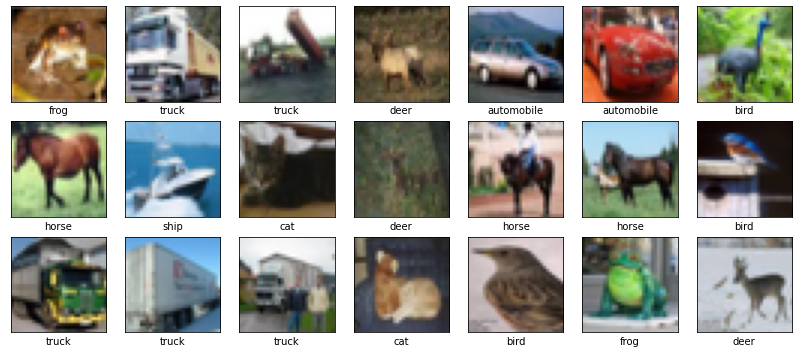

In [4]:
visu(x_train,y_train)

In [5]:
# Exercício 11.2 - Nº 01
def block(input_layer, filter, kernel_size, activation='relu', padding='same', drop_out=True, normalization=True, drop_out_radio=0.3):
  camCov = Conv2D(filter, kernel_size, padding = padding, activation=activation)(input_layer)
  max_pooling = MaxPooling2D((2,2),padding=padding)(camCov)
  if drop_out:
    camCov = Dropout(drop_out_radio)(max_pooling)
  if normalization:
    camCov = BatchNormalization()(camCov)
  return camCov

def ImgVis(input_layer, neuron, dense_act='relu', out_act='softmax', num=10):
  chat = Flatten()(input_layer)
  clas = Dense(neuron, activation=dense_act)(chat)
  out = Dense(num, activation=out_act)(clas)
  return out

In [6]:
# Exercícios 11.2 - Nº 02a
img = Input(shape=(32,32,3))

bloco1 = block(img, 32, 3)
bloco2 = block(bloco1, 64, 3)
bloco3 = block(bloco2, 128, 3)

out_n = ImgVis(bloco3, 128)

modelo = Model(inputs=img, outputs=out_n)
early = EarlyStopping(patience=10,restore_best_weights=True)
modelo.compile(optimizer = Adam(),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

modelo.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496 

In [7]:
# Exercícios 11.2 - Nº 02b
img2 = Input(shape=(32,32,3))

bloco1_2 = block(img2, 32, 3)
bloco2_2 = block(bloco1_2, 64, 3)
bloco3_2 = block(bloco2_2, 128, 3)

out_n2 = ImgVis(bloco3_2, 128)

modelo2 = Model(inputs=img2, outputs=out_n2)
early2 = EarlyStopping(patience=10,restore_best_weights=True)
modelo2.compile(optimizer = Adam(),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

modelo2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 batch_normalization_3 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        1849

In [8]:
noAug = modelo.fit(x_train, yTrainCod, batch_size=128, epochs=50, callbacks=early, validation_data=(x_test, yTestCod))

Epoch 1/50
391/391 [==============================] - 18s 12ms/step - loss: 0.2479 - accuracy: 0.4373 - val_loss: 0.2038 - val_accuracy: 0.5441
Epoch 2/50
391/391 [==============================] - 4s 10ms/step - loss: 0.1857 - accuracy: 0.5928 - val_loss: 0.1780 - val_accuracy: 0.6127
Epoch 3/50
391/391 [==============================] - 4s 10ms/step - loss: 0.1622 - accuracy: 0.6537 - val_loss: 0.1934 - val_accuracy: 0.5938
Epoch 4/50
391/391 [==============================] - 4s 9ms/step - loss: 0.1482 - accuracy: 0.6897 - val_loss: 0.1491 - val_accuracy: 0.6881
Epoch 5/50
391/391 [==============================] - 4s 10ms/step - loss: 0.1372 - accuracy: 0.7146 - val_loss: 0.1357 - val_accuracy: 0.7193
Epoch 6/50
391/391 [==============================] - 4s 10ms/step - loss: 0.1289 - accuracy: 0.7343 - val_loss: 0.1489 - val_accuracy: 0.6990
Epoch 7/50
391/391 [==============================] - 4s 10ms/step - loss: 0.1227 - accuracy: 0.7490 - val_loss: 0.1205 - val_accuracy: 0.7552

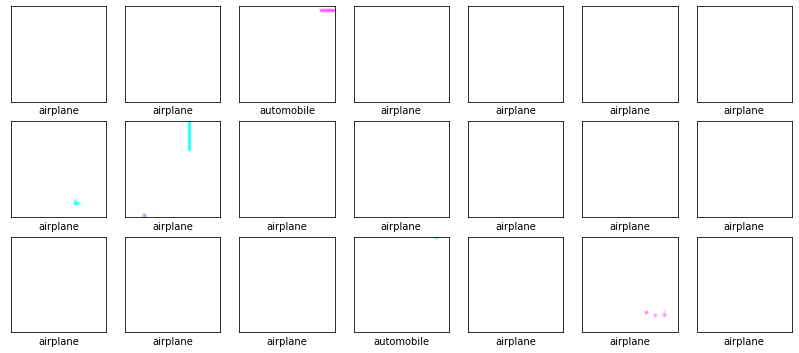

In [9]:
# Exercício 11.3 - Nº 02a
imgGen = ImageDataGenerator(horizontal_flip=True, width_shift_range=0.3, height_shift_range=0.3)

imgGen.fit(x_train)

augi = imgGen.flow(x_train,yTrainCod, batch_size=128)

x_aug, y_aug = next(augi)

visu(x_aug,y_aug)

In [10]:
# Exercício 11.3 - Nº 02b
aug_model = modelo2.fit(augi, steps_per_epoch=x_train.shape[0]//128, epochs=50, callbacks=early, validation_data=(x_test, yTestCod))

Epoch 1/50
390/390 [==============================] - 26s 64ms/step - loss: 0.2783 - accuracy: 0.3309 - val_loss: 0.2435 - val_accuracy: 0.4195
Epoch 2/50
390/390 [==============================] - 25s 64ms/step - loss: 0.2418 - accuracy: 0.4282 - val_loss: 0.2355 - val_accuracy: 0.4510
Epoch 3/50
390/390 [==============================] - 25s 64ms/step - loss: 0.2230 - accuracy: 0.4886 - val_loss: 0.2762 - val_accuracy: 0.4214
Epoch 4/50
390/390 [==============================] - 25s 63ms/step - loss: 0.2099 - accuracy: 0.5272 - val_loss: 0.2990 - val_accuracy: 0.4317
Epoch 5/50
390/390 [==============================] - 24s 62ms/step - loss: 0.1992 - accuracy: 0.5514 - val_loss: 0.3046 - val_accuracy: 0.4611
Epoch 6/50
390/390 [==============================] - 24s 63ms/step - loss: 0.1917 - accuracy: 0.5721 - val_loss: 0.2279 - val_accuracy: 0.5308
Epoch 7/50
390/390 [==============================] - 25s 63ms/step - loss: 0.1843 - accuracy: 0.5933 - val_loss: 0.2508 - val_accuracy:

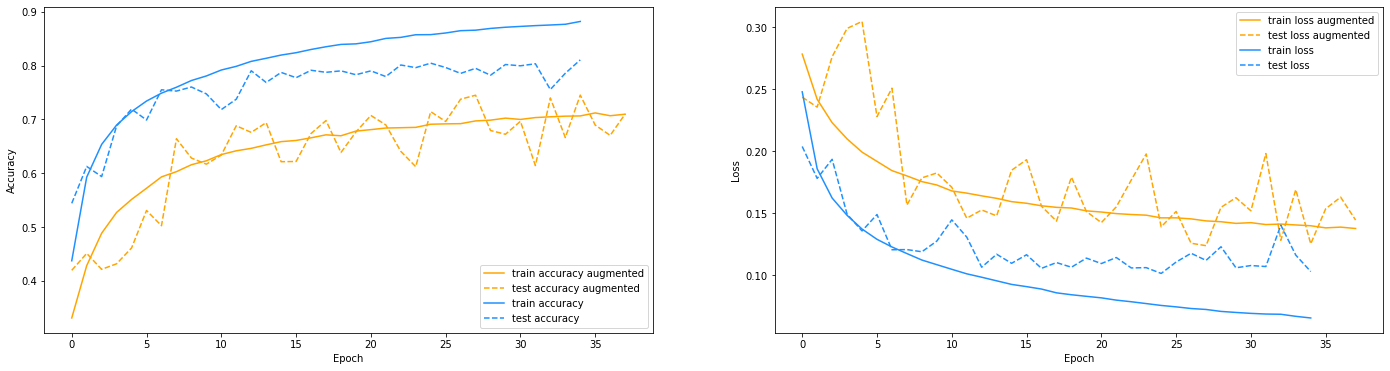

In [12]:
# Exercício 11.3 - Nº 03
fig, ax = plt.subplots(1, 2,  figsize = (24,6));

ax[0].plot(aug_model.history['accuracy'],
         label='train accuracy augmented',
         c='orange', ls='-')
ax[0].plot(aug_model.history['val_accuracy'],
         label='test accuracy augmented',
         c='orange',ls='--')
ax[0].plot(noAug.history['accuracy'],
         label='train accuracy',
         c='dodgerblue', ls='-')
ax[0].plot(noAug.history['val_accuracy'],
         label='test accuracy',
         c='dodgerblue', ls='--')

ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='lower right')

# Valores de perda
ax[1].plot(aug_model.history['loss'],
         label='train loss augmented',
         c='orange', ls='-')
ax[1].plot(aug_model.history['val_loss'],
         label='test loss augmented',
         c='orange',ls='--')
ax[1].plot(noAug.history['loss'],
         label='train loss',
         c='dodgerblue', ls='-')
ax[1].plot(noAug.history['val_loss'],
         label='test loss',
         c='dodgerblue',ls='--')

ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='upper right')

In [13]:
resultNoAug = modelo.evaluate(x_test, yTestCod)
print(resultNoAug)

resultAug = modelo2.evaluate(x_test, yTestCod)
print(resultAug)

313/313 [==============================] - 1s 3ms/step - loss: 0.1014 - accuracy: 0.8047
[0.10135610401630402, 0.8047000169754028]
313/313 [==============================] - 1s 3ms/step - loss: 0.1238 - accuracy: 0.7451
[0.12375406175851822, 0.7451000213623047]
